## Data Wrangling

For my second capstone project I will be building a loan default predictor using Imperial College of London's loan default data available on kaggle.  All of the features, excluding a unique ID, and target columns are masked, therefore providing no way to gain any insight into the variable.  The initial size of the data is 105471 rows, by 767 columns.  The initial goal is to reduce the number of columns by finding which features could be useful and dropping the others.  Data wrangling will be performed with various methods of feature selection.  I am interested in comparing the performance of different feature selection methods with other dimensional reduction techniques such as principal component analysis. The final product of this notebook will be two dataframes containing the features from the results of filter and ensemble feature selection methods.  These datasets will then be used in classification models, along with the original dataframe to apply dimension reduction.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Feature Selection: Filter Methods

In [114]:
df = pd.read_csv('C:\\Users\\pseudo_bounce\\Desktop\\recent_dl\\loan-default-prediction\\train.csv')

C:\Users\pseudo_bounce\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
#Drop mixed data type columns [135,204,274,417]
drop_mix = list(df.columns[[135,204,274,417]])
df.drop(drop_mix,axis=1,inplace=True)

In [116]:
#Check dataframe shape
df.shape

(105471, 767)

In [117]:
#Inspect field names
df.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=767)

In [118]:
#See if id's are unique
df['id'].nunique() == len(df)

True

In [119]:
#Create binary variable from target column 'loss'
#drop loss column
df['default'] = df['loss'].apply(lambda x: 1 if x > 0 else x)
df.drop('loss',axis=1,inplace=True)

In [120]:
df.shape

(105471, 767)

In [121]:
#Get counts of datatypes
df.dtypes.value_counts()

float64    653
int64       99
object      15
dtype: int64

### Object Columns

In [122]:
#Filter object data types and inspect head
dt_object = df.select_dtypes(include='object')
dt_object.head()

,f138,f207,f277,f338,f390,f391,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,754485076006959972352,38600000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,15300000000000000,1690000000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,6910365323840000000,389000000000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,11225194901267999096832,35000000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,108000000000000,1870000000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [123]:
#look for null values
dt_object.isnull().sum()

f138     182
f207    1291
f277     101
f338       0
f390     698
f391     698
f420       0
f469       0
f472       0
f534       0
f537       0
f626     698
f627     698
f695     698
f698     698
dtype: int64

In [124]:
#Create df to examine cardinality of object columns, assumed to be categorical in nature

#Store count of unique values per column in list
f = []
for col in dt_object.columns:
    f.append(len(dt_object[col].unique()))

#Store each column name in list
n = [x for x in dt_object.columns]

cards = dict(zip(n,f)) #zip list or store in dictionary
cardinality = pd.DataFrame(list(cards.items()), columns=['Column', 'Count of Unique Values']) #create dataframe from dictionary
cardinality.set_index('Column',inplace=True) #set index to the column name
cardinality #inspect cardinality

,Count of Unique Values
Column,
f138,31152
f207,14511
f277,28710
f338,8663
f390,104662
f391,104659
f420,25772
f469,86420
f472,102913


Based on the assumption that the object columns are categorical features, each feature shows high cardinality.  Given that we are trying to eliminate features, creating dummy variables would not make sense at this time.  It is also impossible to make any sense of what these features could possibly be.  Furthermore, tree methods will be used in the feature selection and modeling phase, which have a tendency to overfit to features with high cardinality. Keeping these features would only serve to complicate things.  However, we can make plots of the value counts to see if there are any interesting patterns that could clue us in on if these features have meaning.

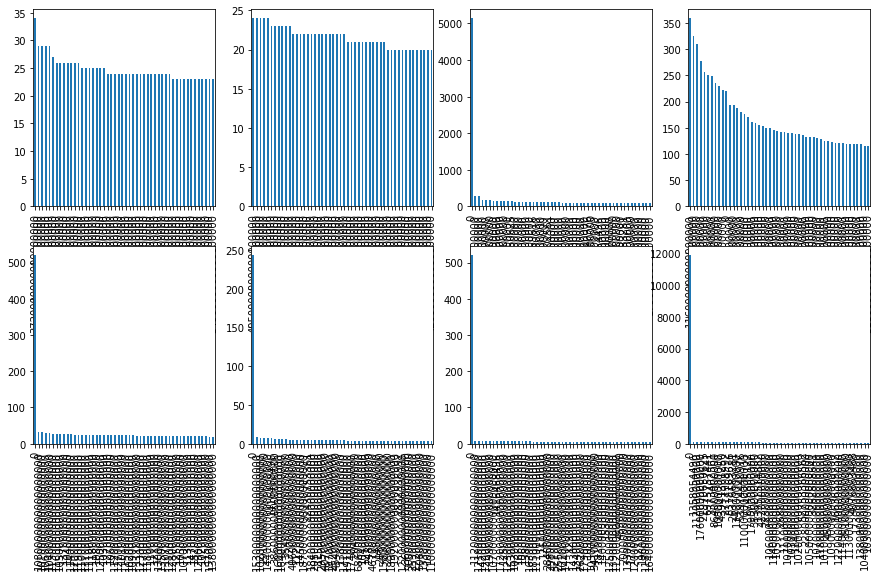

In [125]:
figure, axes = plt.subplots(2, 4)

dt_object['f698'].value_counts().head(50).plot(ax=axes[0,0],kind='bar',figsize=(15,8))
dt_object['f695'].value_counts().head(50).plot(ax=axes[0,1],kind='bar')
dt_object['f207'].value_counts().head(50).plot(ax=axes[0,2],kind='bar')
dt_object['f277'].value_counts().head(50).plot(ax=axes[0,3],kind='bar')
dt_object['f469'].value_counts().head(50).plot(ax=axes[1,0],kind='bar')
dt_object['f537'].value_counts().head(50).plot(ax=axes[1,1],kind='bar')
dt_object['f472'].value_counts().head(50).plot(ax=axes[1,2],kind='bar')
dt_object['f420'].value_counts().head(50).plot(ax=axes[1,3],kind='bar')


In [126]:
#drop object columns from df
df.drop(dt_object.columns,axis=1,inplace=True)

In [127]:
df.shape

(105471, 752)

In [128]:
df.dtypes.value_counts()

float64    653
int64       99
dtype: int64

In [130]:
all_cols = list(df.columns)

### Integer Columns

In [17]:
int_cols = df.select_dtypes(include='int64')

In [18]:
int_cols.shape

(105471, 99)

In [19]:
#Check correlation of integer features to target column
corr_mat = int_cols.corr()['default'].to_frame()
corr_mat['default'].sort_values(ascending=False).to_frame().head(50)


,default
default,1.000000
f25,0.101329
f477,0.062001
f24,0.061610
f465,0.060250
f480,0.058471
f467,0.051949
f478,0.051949
f447,0.051560
f16,0.043207


In [20]:
#Filter columns wither filter threshold > 0.01
int_drop_cols = corr_mat[corr_mat['default'] < 0.01]

In [21]:
int_drop_cols.index

Index(['f2', 'f4', 'f5', 'f6', 'f13', 'f36', 'f68', 'f73', 'f74', 'f284',
       'f285', 'f286', 'f287', 'f293', 'f294', 'f295', 'f296', 'f309', 'f310',
       'f311', 'f312', 'f325', 'f326', 'f327', 'f328', 'f335', 'f336', 'f337',
       'f345', 'f354', 'f362', 'f371', 'f379', 'f380', 'f381', 'f382', 'f400',
       'f403', 'f408', 'f417', 'f418', 'f427', 'f597', 'f599', 'f656', 'f657',
       'f658', 'f659', 'f670', 'f681', 'f693', 'f699', 'f722', 'f725', 'f728',
       'f729', 'f730', 'f731', 'f732', 'f741', 'f770', 'f776', 'f777', 'f778'],
      dtype='object')

In [22]:
#Drop integer columns with correaltion to target < 0.01
df.drop(int_drop_cols.index,axis=1,inplace=True)
df.shape

(105471, 688)

In [23]:
df.dtypes.value_counts()

float64    653
int64       35
dtype: int64

### Float columns

In [24]:
float_cols = df.select_dtypes(include='float64')

In [25]:
float_cols.head()

,f3,f7,f8,f9,f10,f14,f15,f17,f18,f19,...,f765,f766,f767,f768,f769,f771,f772,f773,f774,f775
0,0.686842,7201.0,4949.0,126.75,126.03,0.7607,0.7542,0.7236,0.7236,0.5171,...,-0.40,-0.560,-0.440,-0.6280,-3.14,2.14,-1.54,1.18,0.1833,0.7873
1,0.782776,240.0,1625.0,123.52,121.35,0.6555,0.6555,0.6341,0.6341,0.3909,...,-0.17,-0.275,-0.203,-0.2300,-1.38,0.54,-0.24,0.13,0.1926,-0.6787
2,0.500080,1800.0,1527.0,127.76,126.49,0.7542,0.7542,0.7542,0.7542,0.5508,...,-0.58,-0.540,-0.572,-0.3985,-5.18,2.89,-1.73,1.04,0.2521,0.7258
3,0.439874,7542.0,1730.0,132.94,133.58,0.8017,0.7881,0.7881,0.7881,0.5923,...,-0.75,-0.635,-0.745,-0.5100,-2.04,1.29,-0.89,0.66,0.2498,0.7119
4,0.502749,89.0,491.0,122.72,112.77,0.5263,0.5263,0.5263,0.5263,0.3044,...,-0.18,-0.280,-0.182,-0.4277,-11.12,6.11,-3.82,2.51,0.2282,-0.5399


In [26]:
#Include target to check float columns correlation with target
float_target = list(float_cols.columns)
float_target.append('default')
floats_df = df[float_target]
floats_df.head()

,f3,f7,f8,f9,f10,f14,f15,f17,f18,f19,...,f766,f767,f768,f769,f771,f772,f773,f774,f775,default
0,0.686842,7201.0,4949.0,126.75,126.03,0.7607,0.7542,0.7236,0.7236,0.5171,...,-0.560,-0.440,-0.6280,-3.14,2.14,-1.54,1.18,0.1833,0.7873,0
1,0.782776,240.0,1625.0,123.52,121.35,0.6555,0.6555,0.6341,0.6341,0.3909,...,-0.275,-0.203,-0.2300,-1.38,0.54,-0.24,0.13,0.1926,-0.6787,0
2,0.500080,1800.0,1527.0,127.76,126.49,0.7542,0.7542,0.7542,0.7542,0.5508,...,-0.540,-0.572,-0.3985,-5.18,2.89,-1.73,1.04,0.2521,0.7258,0
3,0.439874,7542.0,1730.0,132.94,133.58,0.8017,0.7881,0.7881,0.7881,0.5923,...,-0.635,-0.745,-0.5100,-2.04,1.29,-0.89,0.66,0.2498,0.7119,0
4,0.502749,89.0,491.0,122.72,112.77,0.5263,0.5263,0.5263,0.5263,0.3044,...,-0.280,-0.182,-0.4277,-11.12,6.11,-3.82,2.51,0.2282,-0.5399,0


In [27]:
float_corr = floats_df.corr()['default'].to_frame()

In [28]:
float_corr['default'].sort_values(ascending=False).head(75)

default    1.000000
f322       0.123838
f323       0.111113
f314       0.110452
f376       0.103534
             ...   
f475       0.066454
f128       0.066079
f127       0.066079
f126       0.066079
f125       0.066079
Name: default, Length: 75, dtype: float64

In [29]:
float_drops = float_corr[float_corr['default'] < 0.04]

In [30]:
floats_2_drop = list(float_drops.index)

In [31]:
floats_2_drop

['f3',
 'f8',
 'f9',
 'f10',
 'f42',
 'f43',
 'f44',
 'f48',
 'f52',
 'f53',
 'f54',
 'f58',
 'f62',
 'f66',
 'f67',
 'f69',
 'f70',
 'f71',
 'f72',
 'f75',
 'f76',
 'f77',
 'f80',
 'f81',
 'f82',
 'f83',
 'f90',
 'f91',
 'f92',
 'f93',
 'f100',
 'f101',
 'f102',
 'f103',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f120',
 'f121',
 'f123',
 'f130',
 'f131',
 'f132',
 'f133',
 'f134',
 'f136',
 'f139',
 'f140',
 'f141',
 'f142',
 'f143',
 'f144',
 'f145',
 'f146',
 'f147',
 'f148',
 'f150',
 'f154',
 'f155',
 'f156',
 'f157',
 'f159',
 'f160',
 'f164',
 'f165',
 'f166',
 'f167',
 'f169',
 'f170',
 'f171',
 'f172',
 'f173',
 'f174',
 'f175',
 'f176',
 'f177',
 'f178',
 'f179',
 'f180',
 'f184',
 'f185',
 'f186',
 'f187',
 'f189',
 'f190',
 'f194',
 'f195',
 'f196',
 'f197',
 'f199',
 'f200',
 'f201',
 'f202',
 'f203',
 'f204',
 'f205',
 'f208',
 'f209',
 'f210',
 'f211',
 'f212',
 'f213',
 'f214',
 'f215',
 'f216',
 'f217',
 'f218',
 'f220',
 'f222',
 'f229',
 'f230',
 'f231',
 'f232'

In [32]:
df.drop(floats_2_drop,axis=1,inplace=True)

In [33]:
df.shape

(105471, 279)

In [34]:
df.dtypes.value_counts()

float64    244
int64       35
dtype: int64

In [35]:
df.head()

,id,f1,f7,f14,f15,f16,f17,f18,f19,f20,...,f674,f677,f678,f700,f701,f702,f736,f763,f764,default
0,1,126,7201.0,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,...,33,3.0,0.0,0,0,0,1,-0.1524,1,0
1,2,121,240.0,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,...,43,1.0,0.0,0,0,0,1,-0.3097,1,0
2,3,126,1800.0,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,...,100,9.0,0.0,0,0,0,1,-0.1909,1,0
3,4,134,7542.0,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,...,18,7.0,0.0,0,0,0,1,-0.1770,1,0
4,5,109,89.0,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,...,33,3.0,0.0,0,0,0,1,-0.4444,1,0


### Remove constant/quasi-constant features

In [36]:
#Check for constant columns
constant_features = [feat for feat in df.columns if df[feat].std() <= 0.01]

In [37]:
constant_features

['f33',
 'f34',
 'f35',
 'f37',
 'f38',
 'f678',
 'f700',
 'f701',
 'f702',
 'f736',
 'f764']

In [38]:
f'{len(constant_features)} features have been found to be constant/quasi constant and will be removed'

'11 features have been found to be constant/quasi constant and will be removed'

In [39]:
df.drop(constant_features,axis=1,inplace=True)

In [40]:
df.shape

(105471, 268)

In [42]:
df.dtypes.value_counts()

float64    243
int64       25
dtype: int64

In [43]:
feat = list(df.columns)

In [44]:
feat.pop(-1)

'default'

In [45]:
feat.pop(0)

'id'

In [46]:
features = df[feat]

In [47]:
features

,f1,f7,f14,f15,f16,f17,f18,f19,f20,f21,...,f606,f608,f623,f640,f641,f642,f643,f674,f677,f763
0,126,7201.0,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,...,43715.465,7173.0,1.141477e+09,94.417,0.762765,0.750977,0.781186,33,3.0,-0.1524
1,121,240.0,0.6555,0.6555,245815,0.6341,0.6341,0.3909,0.6667,0.6903,...,1493.475,240.0,1.019287e+09,86.005,0.741765,0.749177,0.679880,43,1.0,-0.3097
2,126,1800.0,0.7542,0.7542,1385872,0.7542,0.7542,0.5508,0.7542,0.8091,...,12346.125,1779.0,1.371877e+09,88.168,0.792410,0.786338,0.723983,100,9.0,-0.1909
3,134,7542.0,0.8017,0.7881,704687,0.7881,0.7881,0.5923,0.7881,0.8230,...,44551.520,7532.0,1.731281e+09,87.051,0.906675,0.930015,0.884525,18,7.0,-0.1770
4,109,89.0,0.5263,0.5263,51985,0.5263,0.5263,0.3044,0.5405,0.5556,...,539.310,89.0,1.757310e+09,72.670,0.678565,0.625417,0.747705,33,3.0,-0.4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105466,126,331.0,0.4878,0.4878,9281480,0.4918,0.4615,0.2147,0.4615,0.4800,...,2532.695,331.0,1.365059e+09,81.811,0.650120,0.512216,0.702837,9,1.0,-0.5200
105467,137,3898.0,0.7227,0.7049,901745,0.6880,0.6880,0.5147,0.6935,0.7818,...,26238.335,3888.0,2.397203e+09,79.206,0.697970,0.724346,0.685297,6,3.0,-0.2182
105468,129,7081.0,0.7727,0.7658,12380709,0.7328,0.7328,0.5270,0.7328,0.7798,...,44029.285,7066.0,2.486544e+09,75.799,0.741275,0.746295,0.766413,7,6.0,-0.2202
105469,129,4984.0,0.4915,0.4793,3065069,0.4874,0.4793,0.2200,0.5043,0.5321,...,32079.980,4977.0,9.786238e+08,NaN,0.394725,0.506505,0.393515,30,2.0,-0.4679


### Removing Correlated Features

In [48]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(features, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  214


In [49]:
len(corr_features)

214

In [50]:
df.drop(corr_features,axis=1,inplace=True)

In [51]:
df.shape

(105471, 54)

In [54]:
df.dtypes.value_counts()

float64    47
int64       7
dtype: int64

In [56]:
filt_cols = list(df.columns)

Using an array of filter methods we were able to reduce the number of columns features columns to 23 inclusing the target.  Object columns, all with high cardinalities, have been removed.  Integer and Float columns have been reduced by correlating the features against the target column and removing features with a target correlation value threshold.  Columns are further reduced by removing correlated, and constant/quasi_constant features.

### Feature Selection: Ensemble methods

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [58]:
df_rf = pd.read_csv('C:\\Users\\pseudo_bounce\\Desktop\\recent_dl\\loan-default-prediction\\train.csv')

C:\Users\pseudo_bounce\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
#Drop mixed data type columns [135,204,274,417]
drop_mix = list(df_rf.columns[[135,204,274,417]])
df_rf.drop(drop_mix,axis=1,inplace=True)

In [60]:
#drop Object columns all with high cardinality
df_rf.drop(dt_object.columns,axis=1,inplace=True)

In [61]:
#remove null rows
df_rf.dropna(inplace=True)

In [62]:
df_rf.shape

(51940, 752)

In [63]:
df_rf.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778',
       'loss'],
      dtype='object', length=752)

In [64]:
#Create binary variable from target column 'loss'
#drop loss column
df_rf['default'] = df_rf['loss'].apply(lambda x: 1 if x > 0 else x)
df_rf.drop(['loss','id'],axis=1,inplace=True)

In [65]:
X = df_rf.drop(labels=['default'],axis=1)
y = df_rf['default']

In [66]:
select = SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=10))

In [67]:
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,


In [68]:
select.get_support()

array([ True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [84]:
selected_features = list(X.columns[(select.get_support())])

In [85]:
selected_features.append('default')

In [86]:
len(selected_features)

334

In [87]:
forest_cols = df_rf[selected_features]

In [88]:
forest_cols.shape

(51940, 334)

In [89]:
forest_cols.columns

Index(['f1', 'f3', 'f6', 'f9', 'f10', 'f13', 'f14', 'f15', 'f16', 'f17',
       ...
       'f765', 'f766', 'f767', 'f768', 'f771', 'f772', 'f774', 'f775', 'f778',
       'default'],
      dtype='object', length=334)

In [90]:
forest_cols = list(forest_cols.columns)

In [94]:
filt_cols.pop(0)

'id'

In [132]:
all_cols.pop(0)

'id'

### Persisting Feature Selection Dictionary
In order to easily select the resulting columns of the feature selection methods in future notebooks the columns are saved into a list and stored as values with the feature selection method as the key.  The all columns list is saved for use with PCA.  This list contains all columns except the mixed data type and object columns not used in the analysis.

In [136]:
fs_cols = {'filt_cols':filt_cols,
          'rf_cols':forest_cols,
          'all_cols':all_cols}

In [137]:
import json

with open('feats_list.json', 'w') as fp:
    json.dump(fs_cols, fp)